# Thinkful Date Science Bootcamp Unit One Capstone

#### Roy Shabaya

Citi Bike is a bike sharing system in New York City allowing riders to rent bikes for short periods since 2013.  Using a system of 706 stations and 10,000 bikes riders are able to rent the bike for 30 or 45 minutes.  Riders may purchase either a one day or three day pass, a level which Citi Bike classifies as a Customer.  Riders may also purchase an annual pass, which Citi Bike classifies as a Subscriber.  Citi Bike believes the annual pass is the best value for Customers, not only providing a lower overall cost for regular riders, but also having an extended rental time of 45 minutes, versus 30 minutes for customers.  Over the last two years 88.78 of Citi Bike customers were Subscribers with an annual pass.  

<function matplotlib.pyplot.show>

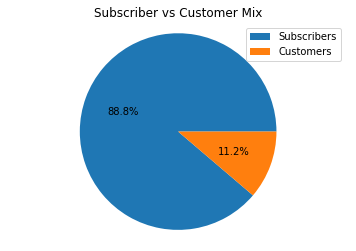

In [31]:
#Sep by year to see how changing
subscriber = ((user_pivot.Subscriber.sum())/(user_pivot.Customer.sum() + user_pivot.Subscriber.sum()))
customer = 1 - subscriber
pie_data = [subscriber,customer]
plt.pie(pie_data, autopct="%0.01f%%")
plt.title("Subscriber vs Customer Mix")
pie_legend = ["Subscribers","Customers"]
plt.legend(pie_legend)
plt.axis("equal")
plt.show

However at several high volume stations the percentage of riders originating from that station that are a Subscriber are below 50%.  Based on this fact there is opportunity to target stations with Subscriber percentages below 50% with strategies to convert some Customers to Subscribers.  Subscribers are desirable to Citi Bike as the annual payment required represents guaranteed payments and revenue for Citi Bike.  Whereas Customers may use the service sporadically, as well as be tempted to use other services.  Therefore it is ideal for Citi Bike to increase the percentage of riders who are Subscribers.

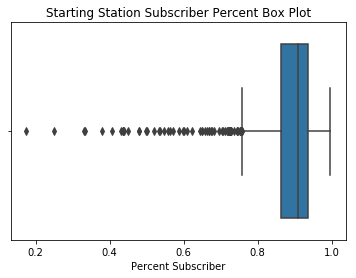

In [32]:
#Create Box Plot
box = user_pivot["Percent Subscriber"]
sns.boxplot(box)
plt.title("Starting Station Subscriber Percent Box Plot")
plt.show()

As shown by the box plot above most stations have a Subscriber percent above 75%, the the median near 90%.  However the outliers highlight that there are quite a few stations where they may be oppurtunity for improvement.  

#### The Data

<br>Data XXX was obtained from Citi Bike NYC.  Data from October 2015 to September 2017 was used in this analysis.  Citi Bike's data outlines the start and end station, length of the trip and type of customer.  Demographic information on the user is also included, their birth year and gender.

Below are the columns used:

start station name - Name of the riders starting station. 
<br>starttime - Time and date when rider began their trip.
<br>usertype - Typer of user, Customer or Subscriber.

Full list of columns (total 15 columns):

tripduration
<br> starttime
<br>stoptimestart station id
<br>start station name
<br>start station latitude
<br>start station longitude
<br>end station id
<br>end station name
<br>end station latitude
<br>end station longitude
<br>bikeid
<br>usertype
<br>birth year
<br>gender

In [44]:
print("Sample of the data:")
file.head()

Sample of the data:


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,171,10/1/2015 00:00:02,10/1/2015 00:02:54,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,24302,Subscriber,1973.0,1,10/1/2015
1,593,10/1/2015 00:00:02,10/1/2015 00:09:55,518,E 39 St & 2 Ave,40.747804,-73.973442,438,St Marks Pl & 1 Ave,40.727791,-73.985649,19904,Subscriber,1990.0,1,10/1/2015
2,233,10/1/2015 00:00:11,10/1/2015 00:04:05,447,8 Ave & W 52 St,40.763707,-73.985162,447,8 Ave & W 52 St,40.763707,-73.985162,17797,Subscriber,1984.0,1,10/1/2015
3,250,10/1/2015 00:00:15,10/1/2015 00:04:25,336,Sullivan St & Washington Sq,40.730477,-73.999061,223,W 13 St & 7 Ave,40.737815,-73.999947,23966,Subscriber,1984.0,1,10/1/2015
4,528,10/1/2015 00:00:17,10/1/2015 00:09:05,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,16246,Customer,NaN,0,10/1/2015


##### The Potential Solution
In order to help convert customers to subscribers sales persons will be posted at select starting stations to discuss the different subscription options with customers.  We believe that having a conversation about their riding habits will increase the number of subscribers and improve the percentage of overall riders who are subscribers. 


##### The Method of Testing the Solution
In order to perform this test two medium volume stations with below 50% of their riders being subscribers will have sales people posted at the kiosk interacting with customers.  Two similar sized stations will also be selected as the control. Riders may return their bikes to their original station, or a different one.  It will be important to focus on interacting with those that are about to start their rides, and not those that are return.  The sales person will be provided an outline of talking points to review with customers their riding habits and determine if they would potentially benefit from becoming a subscriber.  Due to seasonality where the riding volume decreases during the colder months of November to February the primary riding season is April to October, with peak beginning in June.  


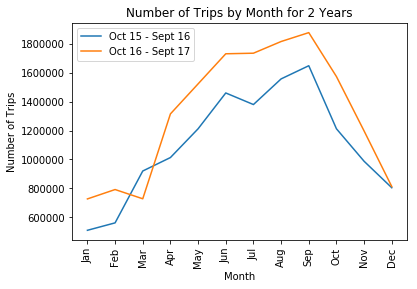

In [33]:
year_1 = final_date_data.loc[final_date_data["12_month"] == "Group 1"]
year_1 = year_1.sort_values("month")
year_2 = final_date_data.loc[final_date_data["12_month"] == "Group 2"]
year_2 = year_2.sort_values("month")

datex=year_1.month
ax=plt.subplot()
year_1_data =year_1.trip_count
year_2_data =year_2.trip_count
plt.plot(datex,year_1_data)
plt.plot(datex,year_2_data)
plt.xticks(rotation=90)
#plt.figure(figsize=(10,10))
groups = ["Oct 15 - Sept 16", "Oct 16 - Sept 17"]
months_leg = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct","Nov", "Dec"]
ax.set_xticklabels(months_leg)
plt.legend(groups)
plt.title("Number of Trips by Month for 2 Years")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
#Legend and labels, month number to month
plt.show()


The test will be performed from the beginning of the riding season in April to July, a period of four months.  We will focus on this period as the best impression of value can be conveyed to the customers while they still have several months of the riding season left.  While October has had the peak number of riders the last two years, it will be difficult to sell an annual pass to a customer just before winter begins and ridership declines dramatically, even if they are then able to use the Subscription the next year. 

We will monitor the change in Subscriber percent between our two test groups, comparing at the end of the 6 month period.  If the Subscriber percent has increased 50% faster for the test group than the control group, we can conclude that using sales people at stations will materially improve the Subscriber percent at below average stations.  We will require such a high bar due to the labor costs related with using people as opposed to just the standard kiosk. Some other metrics we will monitor include number of trips per station.  It will be interesting to see if having an employee will impact overall usage of a station, and not just the mix of Customers and Subscribers.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
%matplotlib inline

In [34]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [9]:
#Bring in Data Files
a1=  pd.read_csv("201510-citibike-tripdata.csv")
a2=  pd.read_csv("201511-citibike-tripdata.csv")
a3=  pd.read_csv("201512-citibike-tripdata.csv")
a4=  pd.read_csv("201601-citibike-tripdata.csv")
a5=  pd.read_csv("201602-citibike-tripdata.csv")
a6=  pd.read_csv("201603-citibike-tripdata.csv")
a7=  pd.read_csv("201604-citibike-tripdata.csv")
a8=  pd.read_csv("201605-citibike-tripdata.csv")
a9=  pd.read_csv("201606-citibike-tripdata.csv")
a10= pd.read_csv("201607-citibike-tripdata.csv")
a11= pd.read_csv("201608-citibike-tripdata.csv")
a12= pd.read_csv("201609-citibike-tripdata.csv")
a13= pd.read_csv("201610-citibike-tripdata.csv")
a14= pd.read_csv("201611-citibike-tripdata.csv")
a15= pd.read_csv("201612-citibike-tripdata.csv")
a16= pd.read_csv("201701-citibike-tripdata.csv")
a17= pd.read_csv("201702-citibike-tripdata.csv")
a18= pd.read_csv("201703-citibike-tripdata.csv")
a19= pd.read_csv("201704-citibike-tripdata.csv")
a20= pd.read_csv("201705-citibike-tripdata.csv")
a21= pd.read_csv("201706-citibike-tripdata.csv")
a22= pd.read_csv("201707-citibike-tripdata.csv")
a23= pd.read_csv("201708-citibike-tripdata.csv")
a24= pd.read_csv("201709-citibike-tripdata.csv")




In [10]:
#Make all column headers the same -- There are slight formatting differences
a1t = a1.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a2t = a2.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a3t = a3.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a4t=  a4.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a5t=  a5.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a6t=  a6.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a7t=  a7.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a8t=  a8.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a9t=  a9.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a10t= a10.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a11t= a11.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a12t= a12.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a13t= a13.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a14t= a14.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a15t= a15.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a16t= a16.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a17t= a17.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a18t= a18.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a19t= a19.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a20t= a20.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a21t= a21.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a22t= a22.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a23t= a23.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a24t= a24.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})


In [11]:
#Merge tables
raw_data = pd.concat([a1t,a2t,a3t,a4t,a5t,a6t,a7t,a8t,a9t,a10t,a11t,a12t,a13t,a14t,a15t,a16t,a17t,a18t,a19t,a20t,a21t,a22t,a23t,a24t])

In [14]:
#raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29095751 entries, 0 to 1878097
Data columns (total 15 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 float64
gender                     int64
dtypes: float64(5), int64(5), object(5)
memory usage: 3.5+ GB


In [15]:
#raw_data.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,2.909575e+07,2.909575e+07,2.909575e+07,2.909575e+07,2.909575e+07,2.909575e+07,2.909575e+07,2.909575e+07,2.588795e+07,2.909575e+07
mean,9.860518e+02,1.152078e+03,4.073715e+01,-7.398584e+01,1.139828e+03,4.073663e+01,-7.398565e+01,2.185729e+04,1.978094e+03,1.106561e+00
std,1.204546e+04,1.242171e+03,3.352088e-02,4.217394e-02,1.236128e+03,9.864001e-02,1.737470e-01,4.341229e+03,1.174150e+01,5.670423e-01
min,6.100000e+01,7.200000e+01,0.000000e+00,-7.403137e+01,7.200000e+01,0.000000e+00,-7.408585e+01,1.452900e+04,1.858000e+03,0.000000e+00
25%,3.790000e+02,3.470000e+02,4.072020e+01,-7.399725e+01,3.460000e+02,4.071939e+01,-7.399726e+01,1.806800e+04,1.970000e+03,1.000000e+00
50%,6.300000e+02,4.710000e+02,4.073827e+01,-7.398789e+01,4.690000e+02,4.073782e+01,-7.398808e+01,2.166200e+04,1.981000e+03,1.000000e+00
75%,1.079000e+03,3.002000e+03,4.075510e+01,-7.397704e+01,2.023000e+03,4.075467e+01,-7.397711e+01,2.554000e+04,1.987000e+03,1.000000e+00
max,9.735948e+06,3.637000e+03,4.550636e+01,0.000000e+00,3.637000e+03,4.550636e+01,0.000000e+00,3.197900e+04,2.001000e+03,2.000000e+00


In [16]:
#Creating working copy
file = raw_data

In [17]:
#file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29095751 entries, 0 to 1878097
Data columns (total 15 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 float64
gender                     int64
dtypes: float64(5), int64(5), object(5)
memory usage: 3.5+ GB


In [19]:
#Add Date Column - Currently date with time
file["date"] = file["starttime"].apply(lambda x: x.split()[0])
#Group by date with count on trip duration
date_data = file.groupby("date").tripduration.count().reset_index()
date_data.rename(columns={"tripduration":"trip_count"},inplace=True)
#Rename
#date_data.head()

,date,trip_count
0,1/1/2016,11009
1,1/10/2016,14275
2,1/11/2016,22937
3,1/12/2016,25211
4,1/13/2016,21133


In [20]:
#date_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 2 columns):
date          723 non-null object
trip_count    723 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.4+ KB


In [21]:
#Convert date column to date formart
date_data["date"] = pd.to_datetime(date_data["date"])
#Extract month from date column and add new column month
date_data["month"] = date_data["date"].apply(lambda x: x.strftime("%m"))
#Extract year from date column and add new column month
date_data["year"] = date_data["date"].apply(lambda x: x.strftime("%Y"))
# ---- date_data["month_year"] = pd.to_datetime(date_data["month_year"])
final_date_data = date_data.groupby(["year","month"]).trip_count.sum().reset_index()

In [42]:
#date_data.info()

In [23]:
#Sort by Date
date_data = date_data.sort_values("date")

In [24]:
#Create new empty column
final_date_data["12_month"] = ""
#Create two 12 month groups for graphing
final_date_data.at[final_date_data.index[0:12], "12_month"] = "Group 1"
final_date_data.at[final_date_data.index[12:], "12_month"] = "Group 2"

In [37]:
year_1 = final_date_data.loc[final_date_data["12_month"] == "Group 1"]
year_1 = year_1.sort_values("month")
year_2 = final_date_data.loc[final_date_data["12_month"] == "Group 2"]
year_2 = year_2.sort_values("month")

datex=year_1.month
#ax=plt.subplot()
year_1_data =year_1.trip_count
year_2_data =year_2.trip_count
#plt.plot(datex,year_1_data)
#plt.plot(datex,year_2_data)
#plt.xticks(rotation=90)
#plt.figure(figsize=(10,10))
#groups = ["Oct 15 - Sept 16", "Oct 16 - Sept 17"]
#months_leg = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct","Nov", "Dec"]
#ax.set_xticklabels(months_leg)
#plt.legend(groups)
#plt.title("Number of Trips by Month for 2 Years")
#plt.xlabel("Month")
#plt.ylabel("Number of Trips")
#Legend and labels, month number to month
#plt.show()


In [ ]:
#final_date_data.head(24)

In [ ]:
#file.head()

In [40]:
#Groupby Start Station and User type
user_type_data = file.groupby(["start station name","usertype"]).tripduration.count().reset_index()
#Pivot user type to columns
user_pivot= user_type_data.pivot(columns = "usertype", index="start station name", values= "tripduration").reset_index()
# Add perecent subscriber column
user_pivot["Percent Subscriber"] = user_pivot["Subscriber"] / (user_pivot["Subscriber"]+ user_pivot["Customer"])
#Sort by Subscriber Percent
user_pivot = user_pivot.sort_values(by="Percent Subscriber",ascending=True).reset_index()
#See top 10 rows of final table
#user_pivot.head(10)



In [41]:
#Calculate Mean, Median, Max, Min, Total Mix
#print("Mean is:" +str(user_pivot["Percent Subscriber"].mean()))
#print("Median is:" +str(user_pivot["Percent Subscriber"].median()))
#print("Max is: " + str(user_pivot["Percent Subscriber"].max()))
#print("Min is: " + str(user_pivot["Percent Subscriber"].min()))
#print("Total Subscriber Percent: " + str((user_pivot.Subscriber.sum())/(user_pivot.Customer.sum() + user_pivot.Subscriber.sum())))

In [38]:
#Sep by year to see how changing
subscriber = ((user_pivot.Subscriber.sum())/(user_pivot.Customer.sum() + user_pivot.Subscriber.sum()))
customer = 1 - subscriber
pie_data = [subscriber,customer]
#plt.pie(pie_data, autopct="%0.01f%%")
#plt.title("Subscriber vs Customer Mix")
#pie_legend = ["Subscribers","Customers"]
#plt.legend(pie_legend)
#plt.axis("equal")
#plt.show

In [39]:
#Create Box Plot
#box = user_pivot["Percent Subscriber"]
#sns.boxplot(box)
#plt.title("Starting Station Subscriber Percent Box Plot")
#plt.show()

